# Week 4 (October 30)

Gonna do my analysis/plotting here instead of having this in the main script.

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from hm.analysis import random_tripoint as rt
from hm.pop_models.pop_random import random as pop_random
from hm.hm_models.gravity import gravity
from hm.hm_models.radiation import radiation

import importlib
importlib.reload(rt)

<module 'hm.analysis.random_tripoint' from '/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/random_tripoint.py'>

#### Gravity
Here I'm using a random distribution for the locations on a 1x1 square with a uniform population distribution of 1.
The gravity law is in its power law form: 
$$ p_{ij} = k_i\frac{m_j}{r^\gamma}$$

In [3]:
N = 60
alpha, beta = 1, 1
gamma = 2.
p = pop_random(N)
g = gravity(p, alpha, beta, gamma, exp=True)

Attempt to plot analytical result of epsilon using:
$$ \epsilon = 1 − \left(1− \frac{\arctan{\frac{r_{jk}/2}{r_{ib}}}}{\pi} \right) \left( \frac{m_j+m_k}{m_b} \right) e^{\gamma\left( r_{ib} − \sqrt{r_{ib}^2 + {\frac{r_{jk}}{2}}^2} \right)} $$

^ *WRONG*

According to our prediction, $\epsilon$ should be close to observed results ONLY for small $r_{jk}$. 

This is what we get:

[14/11/17: the plots below have a different form of the analytical results that was later found wrong] 

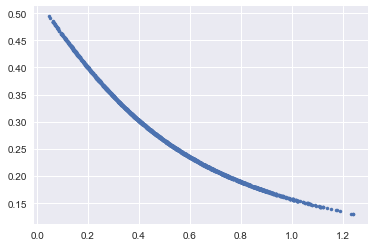

In [53]:
plt.plot(rt.eps_vs_target(p, g)[0], rt.analytical_eps(p, g, 1., 0.), '.') #big r_jk ----> not GOOD
plt.show()

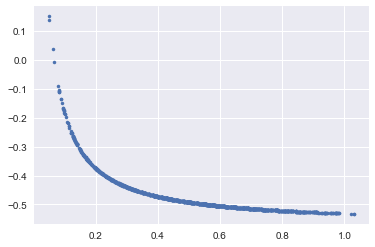

In [33]:
plt.plot(rt.eps_vs_target(p, g)[0], rt.analytical_eps(p, g, 0.05, 0.), '.') #small r_jk ----> YES
plt.show()

New analytical form for $\epsilon$:

$$\epsilon(r_{ib}, r_{jk})_{e} = 1 - \frac{m_j e^{-\gamma r_{ij}} + m_k e^{-\gamma r_{ik}}}{m_b e^{- \gamma r_{ib}}},$$

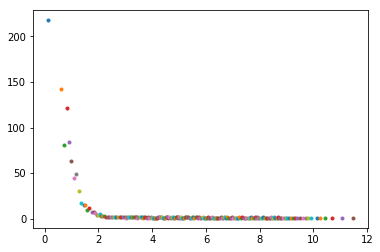

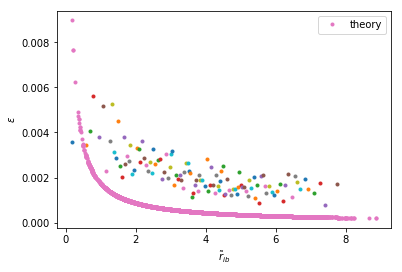

In [20]:
plt.figure()
rt.r_ib_plot(p, g, 0.03)

MEETING NOTES (17/11)

integral >> other terms, hence cancel out

why theory always lower? maybe can set m_b as parameter and vary to see when optimal fit? 

statistical mechanics: effective mass, rescaling parameter in renormalisation because of fluctuations (use chi squared to minimise and find m_b)

expasion of numerator in fraction in integral to find correction

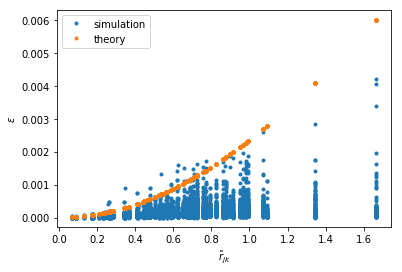

In [16]:
rt.r_jk_plot(p, g, 0.1)

OBSERVE (for previous form, not the most recent):
1. $\epsilon$ as a function of $r_{jk}$ does not give expected result because (maybe) we know that this only works with close locations, so it would diverge as we separate them out more.
2. larger spread (uncertainty) when $\gamma$ is larger ----> can this be because:
    a. interaction between near sites is higher in this case, hence flow between $i$ and $b$ at large distances is subject to 
    b. $$e^{\gamma r_{ij}} \simeq e^{\gamma r_{ik}}$$ doesn't hold for big $\gamma$

With $\tilde{m_b} = m_j + m_k - T_{jk} - T_{kj} $ correction:

In [ ]:
g = gravity(p, alpha, beta, gamma, exp=True)
plt.figure()
rt.r_ib_plot(p, g, 0.03, tilde = True)

# Week 6 (November 13th)

#### Radiation

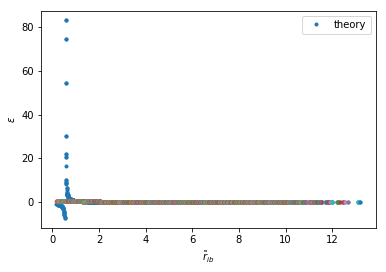

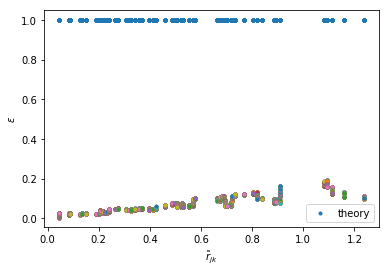

In [14]:
r = radiation(p)
rt.r_ib_plot(p, r, 0., 0.)
rt.r_jk_plot(p, r, 0., 0.)

radiation has higher error even at short range

# Week 7 (November 20th)


Instead of taking the average for an arbitrary interval, here I smooth the data out by using the moving average:

In [33]:
N = 60
alpha, beta = 1, 1
gamma = 0.2
p = pop_random(N)
g = gravity(p, alpha, beta, gamma, exp=True)

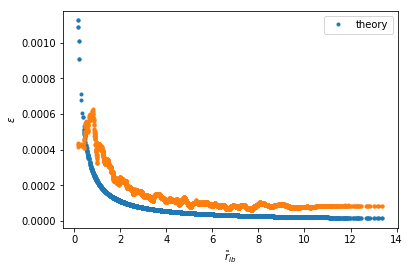

In [16]:
rt.r_ib_plot(p, g, 0.03)

Now plot the ratio between numerical and theoretical result to better see the difference

(also taking the average to smooth out numerical results):

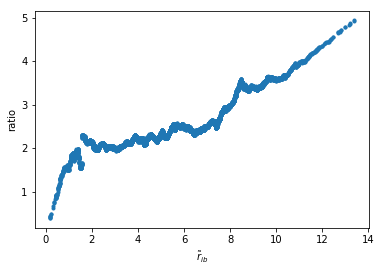

In [17]:
rt.plot_ratio(p, g, 0.03)

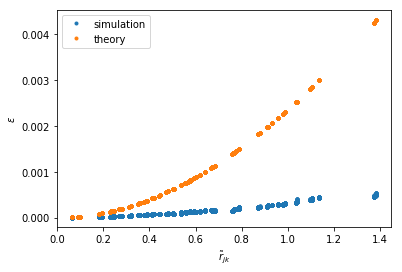

In [24]:
rt.r_jk_plot(p, g, 0.1)

Noticed mistake in derivation of $\epsilon$ for the radiation model. Should instead be:

$$1 - \frac{r_{ib}^2 (\rho \pi r_{ib}^2 -2)}{\left(r_{ib}^2+\frac{r_{jk}}{2}^2\right) \left(\rho \pi\left(r_{ib}^2+\frac{r_{jk}}{2}^2 \right)-1\right)}$$

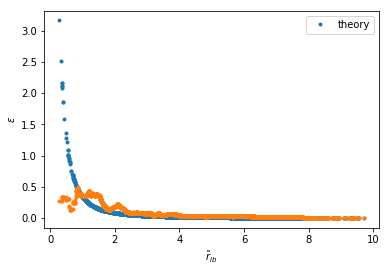

In [34]:
r = radiation(p)
rt.r_ib_plot(p, r, 0.03)

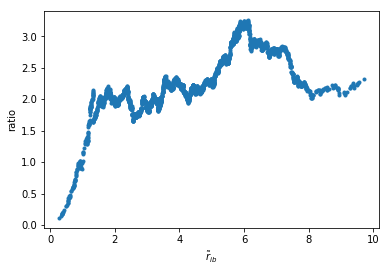

In [35]:
rt.plot_ratio(p, r, 0.03)

[autoreload of hm.analysis.random_tripoint failed: Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/anaconda3/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "/Users/Ilaria/Documents/Imperial/MSci_Project/Code/huma

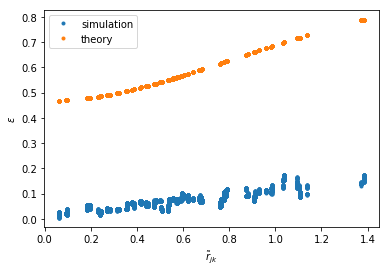

In [26]:
rt.r_jk_plot(p, r, 0.1)